<a href="https://colab.research.google.com/github/313chengpeng/Analysis-of-tweets-about-chatgpt/blob/main/%E4%B8%BB%E9%A2%98%E5%BB%BA%E6%A8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 使用LDA进行主题建模

In [2]:
# 加载云端硬盘

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import re
from tqdm.auto import tqdm
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# 导入数据

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bigdata/data_precess.csv', encoding='utf8')
# df.head(10)

# 数据清洗函数

In [50]:
#Code by Leon Wolber https://www.kaggle.com/leonwolber/reddit-nlp-topic-modeling-prediction
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def remove_line_breaks(text):
    text = text.replace('\r', ' ').replace('\n', ' ')
    return text

#remove punctuation
def remove_punctuation(text):
    re_replacements = re.compile("__[A-Z]+__")  # such as __NAME__, __LINK__
    re_punctuation = re.compile("[%s]" % re.escape(string.punctuation))
    '''Escape all the characters in pattern except ASCII letters and numbers'''
    tokens = word_tokenize(text)
    tokens_zero_punctuation = []
    for token in tokens:
        if not re_replacements.match(token):
            token = re_punctuation.sub(" ", token)
        tokens_zero_punctuation.append(token)
    return ' '.join(tokens_zero_punctuation)

def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', ' ', text)
    return text

def lowercase(text):
    text_low = [token.lower() for token in word_tokenize(text)]
    return ' '.join(text_low)

def remove_stopwords(text):
    custom_stopwords = ['i', 'amp','chang','artificalintellig' ,'tcogfhukqnqz','chatgpt', 'ai', 'https', 'openai' ,'thing' , 'small', 'start' ,'one', 'artifical', 'intellig' ,'you', 'he', 'she', 'it', 'we', 'they', 'am', 'is', 'are', 'was', 'were', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'can', 'could', 'would', 'should', 'will', 'shall', 'may', 'might', 'must']
    stop = set(custom_stopwords)
    word_tokens = nltk.word_tokenize(text)
    text = " ".join([word for word in word_tokens if word not in stop])
    return text

#remobe one character words
def remove_one_character_words(text):
    '''Remove words from dataset that contain only 1 character'''
    text_high_use = [token for token in word_tokenize(text) if len(token)>1]      
    return ' '.join(text_high_use)   
    
#%%
# Stemming with 'Snowball stemmer" package
def stem(text):
    stemmer = nltk.stem.snowball.SnowballStemmer('english')
    text_stemmed = [stemmer.stem(token) for token in word_tokenize(text)]        
    return ' '.join(text_stemmed)

def lemma(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens = nltk.word_tokenize(text)
    text_lemma = " ".join([wordnet_lemmatizer.lemmatize(word) for word in word_tokens])       
    return ' '.join(text_lemma)


#break sentences to individual word list
def sentence_word(text):
    word_tokens = nltk.word_tokenize(text)
    return word_tokens
#break paragraphs to sentence token 
def paragraph_sentence(text):
    sent_token = nltk.sent_tokenize(text)
    return sent_token    


def tokenize(text):
    """Return a list of words in a text."""
    return re.findall(r'\w+', text)

def remove_numbers(text):
    no_nums = re.sub(r'\d+', '', text)
    return ''.join(no_nums)



def clean_text(text):
    _steps = [
    remove_line_breaks,
    remove_one_character_words,
    remove_special_characters,
    lowercase,
    remove_punctuation,
    remove_stopwords,
    stem,
    remove_numbers
]
    for step in _steps:
        text=step(text)
    return text   
#%%

#https://stackoverflow.com/questions/55557004/getting-attributeerror-float-object-has-no-attribute-replace-error-while
#To avoid with tqdm AttributeError: 'float' object has no attribute

df["text"] = df["text"].astype(str)
df["text"] = [x.replace(':',' ') for x in df["text"]]

<>:27: DeprecationWarning: invalid escape sequence \s
<>:27: DeprecationWarning: invalid escape sequence \s
<ipython-input-50-07a4f8a6a64e>:27: DeprecationWarning: invalid escape sequence \s
  text = re.sub('[^a-zA-z0-9\s]', ' ', text)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
df['clean_text'] = pd.Series([clean_text(i) for i in tqdm(df['text'])])

df['clean_text'][0]

  0%|          | 0/117021 [00:00<?, ?it/s]

'bardaigoogl cannabiscommun developerstudentclub domain domainnam domainfor web nft dao mmembervil crypto cryptocur cryptolov cryptonew cryptoinvestor great name sale tcoofkpbryj tcocuwrptkntq'

In [53]:
type(df['clean_text'])

pandas.core.series.Series

In [11]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# df['clean_text'] = pd.Series([clean_text(i) for i in tqdm(df['text'])])

# 将'text'列转换为列表格式
text_list = df['clean_text'].tolist()

# 将文本列表转换为文本矩阵
vectorizer = CountVectorizer()
text_matrix = vectorizer.fit_transform(text_list)

# # 定义主题数和主题建模模型
# num_topics = 5
# lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=0)

# # 对文本矩阵进行主题建模
# lda_model.fit(text_matrix)

# # 将主题分配到每个文本中
# topic_assignments = lda_model.transform(text_matrix)

# # 将主题分配添加到DataFrame中
# df['topic'] = topic_assignments.argmax(axis=1)

# # 循环遍历每个主题
# for i in range(num_topics):
#     # 获取分配给主题i的所有文本
#     topic_texts = df[df['topic'] == i]['text']
    
#     # 将文本保存到同一文件中
#     with open('topic_{}.txt'.format(i), 'w') as f:
#         for text in topic_texts:
#             f.write(text + '\n')


  0%|          | 0/117021 [00:00<?, ?it/s]

In [4]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import LdaModel
from gensim.corpora import Dictionary

In [32]:
df['clean_text'][0]

'bardaigoogl cannabiscommun developerstudentclub domain domainnam domain chatgpt domain domainnam domainforsal web nft ai dao mmembervill crypto cryptocur cryptolov cryptonew cryptoinvestor great name sale https tcoofkpbryj https tcocuwrptkntq'

# 实验新的数据处理方法

In [5]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.5 MB/s eta 0:00:00


In [7]:
import re
import numpy as np
import pandas as pd
from pprint import pprint 
# Gensim 
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['amp','chang','artificalintellig' ,'tcogfhukqnqz','chatgpt', 'ai', 'https', 'openai' ,'thing' , 'small', 'start' ,'one', 'artifical', 'intellig'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
# Import Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bigdata/data_precess.csv', encoding='utf8')


In [9]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
# Convert to list
data = df['text'].tolist()
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]
# 去除链接和网址
data =  [re.sub(r"http\S+|www\S+", "",sent) for sent in data]
# 去除特殊字符和标点符号
data = [re.sub(r"\S+@\S+", "",sent) for sent in data]
data =  [re.sub(r"[^a-zA-Z0-9\s]+", "", sent) for sent in data]



print(data[:1])

['CannabisCommunity DeveloperStudentClubs domains domainnames domain ChatGPT DOMAINS domainnames domainforsale web3 nft ai dao Mmemberville Crypto Cryptocurency CryptoLover CryptoNews CryptoInvestor Great name for sale at  ']


In [10]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(data))
print(data_words[:1])

[['domains', 'domainnames', 'domain', 'chatgpt', 'domains', 'domainnames', 'domainforsale', 'web', 'nft', 'ai', 'dao', 'mmemberville', 'crypto', 'cryptocurency', 'cryptolover', 'cryptonews', 'cryptoinvestor', 'great', 'name', 'for', 'sale', 'at']]


In [11]:
# 创建二元（Bigram）模型和三元（Trigram）模型
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])


/usr/local/lib/python3.9/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['domains_domainnames', 'domain', 'chatgpt', 'domains_domainnames_domainforsale', 'web', 'nft', 'ai', 'dao', 'mmemberville', 'crypto', 'cryptocurency', 'cryptolover', 'cryptonews', 'cryptoinvestor', 'great', 'name', 'for', 'sale', 'at']


In [12]:
 # Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
     """https://spacy.io/api/annotation"""
     texts_out = []
     for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
     return texts_out
 
 
 # Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['domains_domainname', 'domain', 'domains_domainname', 'web', 'cryptoinvestor', 'great', 'name', 'sale']]


In [13]:
 # Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
 # Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
 # View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1)]]


In [14]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                            num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=10,
                                          alpha='auto',
                                           per_word_topics=True)

In [80]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.032*"generate" + 0.023*"even" + 0.023*"find" + 0.016*"research" + 0.016*"text" + 0.015*"model" + 0.013*"understand" + 0.011*"datum" + 0.011*"twitter" + 0.011*"friend"'), (1, '0.039*"use" + 0.026*"get" + 0.023*"make" + 0.019*"new" + 0.018*"know" + 0.017*"try" + 0.016*"think" + 0.016*"go" + 0.015*"see" + 0.014*"time"'), (2, '0.044*"create" + 0.029*"human" + 0.022*"play" + 0.022*"help" + 0.018*"tweet" + 0.018*"replace" + 0.018*"thing" + 0.017*"content" + 0.014*"wonder" + 0.012*"wrong"'), (3, '0.042*"technology" + 0.033*"potential" + 0.026*"tech" + 0.026*"web" + 0.022*"digital" + 0.018*"machinelearning" + 0.018*"business" + 0.018*"impact" + 0.016*"tedious" + 0.016*"style"'), (4, '0.033*"chatbot" + 0.021*"challenge" + 0.018*"present" + 0.017*"creation" + 0.017*"bot" + 0.016*"break" + 0.015*"llm" + 0.012*"open" + 0.012*"implication" + 0.012*"soon"'), (5, '0.053*"code" + 0.023*"job" + 0.020*"guess" + 0.018*"hour" + 0.017*"last" + 0.014*"user" + 0.013*"language" + 0.012*"train" + 0.011

In [78]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis


/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.440708  0.047156       1        1  33.307414
7     -0.011829 -0.420326       2        1  14.034315
0     -0.057508  0.074816       3        1  11.200102
2     -0.034957  0.072847       4        1  10.374444
5     -0.074325  0.060792       5        1   9.192647
3     -0.089125  0.054009       6        1   7.476328
6     -0.085833  0.055833       7        1   7.450752
4     -0.087131  0.054873       8        1   6.963997, topic_info=            Term          Freq         Total Category  logprob  loglift
35           ask  11852.000000  11852.000000  Default  30.0000  30.0000
187        write  10309.000000  10309.000000  Default  29.0000  29.0000
65           use  13335.000000  13335.000000  Default  28.0000  28.0000
90          code   4985.000000   4985.000000  Default  27.0000  27.0000
349       answer   6010.000000   6010.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
557    interview    508.110022    509.021234   Topic8  -4.9438   2.6626
2326       allow    460.569921    461.481205   Topic8  -5.0420   2.6624
29    absolutely    447.798711    448.710474   Topic8  -5.0701   2.6624
2904        blow    423.242844    424.154099   Topic8  -5.1265   2.6623
618      history    420.127894    421.039101   Topic8  -5.1339   2.6623

[271 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
86        4  0.998852     ability
29        8  0.998417  absolutely
295       7  0.997342      accord
1551      8  0.999297    accurate
1301      8  0.998177       admit
...     ...       ...         ...
333       1  0.999800        work
98        7  0.996862       worry
187       2  0.999938       write
701       4  0.998439      writer
1246      4  0.999680       wrong

[242 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 8, 1, 3, 6, 4, 7, 5])

In [81]:
 # Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.590458748973303

Coherence Score:  0.30039911908738903


In [82]:
pyLDAvis.save_html(vis, 'lda_model_vis.html')

# 寻找最优的主题数

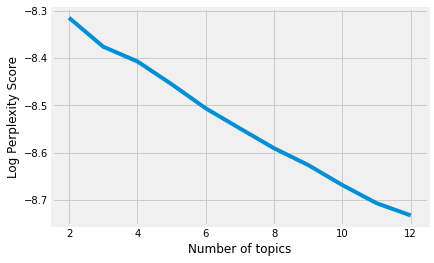

In [83]:
# 创建一个空列表，用于存储每个主题数的困惑度
perplexity_scores = []

# 循环遍历主题数从2到12
for num_topics in range(2, 13):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=num_topics, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=1000,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)
    perplexity_scores.append(lda_model.log_perplexity(corpus))

# 使用matplotlib绘制困惑度随主题数变化的图形
plt.plot(range(2, 13), perplexity_scores)
plt.xlabel("Number of topics")
plt.ylabel("Log Perplexity Score")
plt.show()



# 统计不同主题下的推文数量

In [16]:
pip install pyecharts


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.1/146.1 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.8/136.8 KB 14.1 MB/s eta 0:00:00


In [30]:
pip install pyecharts_snapshot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 12.2 MB/s eta 0:00:00


In [31]:
topic_count = []
for i in range(8):
    topic_docs = lda_model.get_document_topics(corpus)
    count = 0
    for doc in topic_docs:
        if doc[i][1] > 0.1:
            count += 1
    topic_count.append(count)
print(topic_count)


[63192, 117021, 46573, 15637, 12522, 32993, 15866, 108252]


In [32]:
from pyecharts import options as opts
from pyecharts.charts import Bar

bar = (
    Bar()
    .add_xaxis(["Topic 1", "Topic 2", "Topic 3", "Topic 4", "Topic 5", "Topic 6", "Topic 7", "Topic 8"])
    .add_yaxis("Count", topic_count)
    .set_global_opts(title_opts=opts.TitleOpts(title="Topic Count"))
)

bar.render("topic_count_bar_chart.html")
bar.render_notebook()

In [40]:
from textblob import TextBlob

topic_sentiments = []
for i in range(8):
    topic_docs = lda_model.get_document_topics(corpus)
    doc_scores = []
    for j, doc in enumerate(topic_docs):
        if doc[i][1] > 0.1:
            doc_scores.append((j, doc[i][0], doc[i][1]))
    doc_scores = sorted(doc_scores, key=lambda x: x[2], reverse=True)[:200]
    sentiments = {"positive": 0, "neutral": 0, "negative": 0}
    for doc_score in doc_scores:
        text = texts[doc_score[0]]
        text_str = " ".join(text)
        blob = TextBlob(text_str)
        sentiment = blob.sentiment.polarity
        if sentiment > 0:
            sentiments["positive"] += 1
        elif sentiment == 0:
            sentiments["neutral"] += 1
        else:
            sentiments["negative"] += 1
    topic_sentiments.append(sentiments)
print(topic_sentiments)


[{'positive': 83, 'neutral': 60, 'negative': 57}, {'positive': 144, 'neutral': 36, 'negative': 20}, {'positive': 55, 'neutral': 113, 'negative': 32}, {'positive': 46, 'neutral': 142, 'negative': 12}, {'positive': 79, 'neutral': 102, 'negative': 19}, {'positive': 82, 'neutral': 98, 'negative': 20}, {'positive': 71, 'neutral': 107, 'negative': 22}, {'positive': 75, 'neutral': 100, 'negative': 25}]


In [ ]:
bar1= (
    Bar()
    .add_xaxis(x_data)
    .add_yaxis("Positive", y_data[0])
    .add_yaxis("Neutral", y_data[1])
    .add_yaxis("Negative", y_data[2])
    .add_yaxis("Positive", y_data[3])
    .add_yaxis("Neutral", y_data[4])
    .add_yaxis("Negative", y_data[5])
    .add_yaxis("Positive", y_data[6])
    .add_yaxis("Neutral", y_data[7])
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title="Topic Sentiments"))
)

bar.render("topic_sentiments_bar_chart.html")

In [43]:
y_data

[[83, 60, 57],
 [144, 36, 20],
 [55, 113, 32],
 [46, 142, 12],
 [79, 102, 19],
 [82, 98, 20],
 [71, 107, 22],
 [75, 100, 25]]

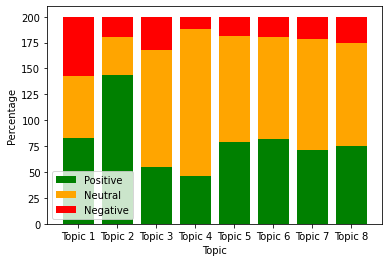

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# 设置数据
y_data = np.array([[83, 60, 57],
 [144, 36, 20],
 [55, 113, 32],
 [46, 142, 12],
 [79, 102, 19],
 [82, 98, 20],
 [71, 107, 22],
 [75, 100, 25]])
x_data = range(len(y_data))

# 绘制堆叠柱状图
fig, ax = plt.subplots()
colors = ['green', 'orange', 'red']
labels = ['Positive', 'Neutral', 'Negative']
bottom = np.zeros(len(y_data))
for i in range(3):
    ax.bar(x_data, y_data[:, i], color=colors[i], label=labels[i], bottom=bottom)
    bottom += y_data[:, i]
ax.set_xticks(x_data)
ax.set_xticklabels([f'Topic {i}' for i in range(1, len(x_data)+1)])
ax.set_xlabel('Topic')
ax.set_ylabel('Percentage')
ax.legend()
plt.show()


In [52]:
plt.savefig('stacked_bar.png')

<Figure size 432x288 with 0 Axes>

In [18]:
import os
import pyecharts.options as opts
from pyecharts.charts import Bar
from gensim import corpora, models

# Load corpus and dictionary
corpus = corpus
dictionary = id2word

# Perform topic modeling
# lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=8)

# Create directory to save topic files
if not os.path.exists('topics'):
    os.makedirs('topics')

# Save each document under corresponding topic file
for i, content in enumerate(corpus):
    topic = max(lda_model[content], key=lambda x: x[1])[0]
    with open(f'topics/topic_{topic}.txt', 'a') as f:
        f.write(f'Document {i}: {" ".join(dictionary[id] for id, freq in content)}\n')


# Get number of documents in each topic
topic_counts = [len(os.listdir(f'topics/topic_{i}')) for i in range(8)]

# Create bar chart
bar_chart = Bar()\
    .add_xaxis([f'Topic {i}' for i in range(8)])\
    .add_yaxis('Number of Documents', topic_counts)\
    .set_global_opts(title_opts=opts.TitleOpts(title='Topic Distribution'))

# Show chart in Jupyter Notebook
bar_chart.render_notebook()


TypeError: ignored

In [ ]:
# 将'text'列转换为列表格式
text_list = df['clean_text'].tolist()

# 将文本列表转换为文本矩阵
vectorizer = CountVectorizer()
text_matrix = vectorizer.fit_transform(text_list)

# # 定义主题数和主题建模模型
# num_topics = 5
# lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=0)

# # 对文本矩阵进行主题建模
# lda_model.fit(text_matrix)

# # 将主题分配到每个文本中
# topic_assignments = lda_model.transform(text_matrix)

# # 将主题分配添加到DataFrame中
# df['topic'] = topic_assignments.argmax(axis=1)

# # 循环遍历每个主题
# for i in range(num_topics):
#     # 获取分配给主题i的所有文本
#     topic_texts = df[df['topic'] == i]['text']
    
#     # 将文本保存到同一文件中
#     with open('topic_{}.txt'.format(i), 'w') as f:
#         for text in topic_texts:
#             f.write(text + '\n')

# 对不同的主题进行情感分析